# What sells a car?

In the following project we are going to analyze a data from Crankshaft List including advertisements for vehicles are published on the site in order to understand what factors influence the price of a vehicle. We will try to identify and omitt outliers in the data, fill or omitt missing values and then, investigate the correlation between car's type, age, mileage, condition, type of transmission or color with it's price, in the two most common vehicle types. 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame
try:
    df=pd.read_csv('C:/Users/NELLY/Downloads/vehicles_us.csv')
except:
    df=pd.read_csv('/datasets/vehicles_us.csv')
original_df=df.copy()

In [3]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [5]:
# print the general/summary information about the DataFrame
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


what we can see from the info?
> model year is a float but it should be a time

>date posted is an object but should be time 

> there are missing values in model_year, cylinders, odometer, paint_color, is_4wd variables. 

First, I want to check the categorical columns in the data to see if there are duplicate values caused by typo's since python is case sensitive:

In [7]:
for col in df.columns:
    if df[col].dtypes== object:
        print(f'The unique values in column {col} are: {df[col].sort_values().unique()}')


The unique values in column model are: ['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f-150' 'ford f-250'
 'ford f-250 sd' 'ford f-250 super duty' 'ford f-350 sd' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion' 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d'
 'ford ranger' 'f

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not not?]

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]

It seems like all the categorical cols include different unique values, but the column of the date the ad was posted is needed to change to different data type.

## Treat missing values 

1. is_4wd:

In [8]:
df.groupby('is_4wd').count()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed
is_4wd,,,,,,,,,,,,
1.0,25572,23764,25572,25572,22993,25572,21696,25572,25572,20942,25572,25572


In [9]:
df[df['is_4wd']!=1.0].shape[0]/df.shape[0]

0.5036972343522562

We see that is_4wd has only values of 1.0 and all the other rows do not have values and constitutes 50% of the data. From that info, it is reasonable to believe that all the missing values are actually equal to 0:

In [10]:
df['is_4wd'].fillna(value=0.0, inplace=True)
#checking if still there are missing values
df.is_4wd.isna().value_counts()

is_4wd
False    51525
Name: count, dtype: int64

2. model_year:
Differnt models are manufactured in different years, some of the models are new and some models are manufactured for many years 
under the same name. Aditionally, it seems reasonable to say that in most of the cases there will be a relationship
between the age of the car and its condition. To fill the missing values with the most accurate value we will group the 
df by model and condition and choose the most common year model for each model&condition.
first we will change the type of the condition variable:

In [11]:
#creating a dictionary that stores the category names as keys and their numerical identifier as value
cond_dict={ 'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

In [12]:
#changing the values in the column from strings to integers.
df['condition']=df['condition'].map(cond_dict)


In [13]:
#grouping the df by model and condition in order to fill missing values of model year with the most common value
df['model_year'] = df.groupby(['model', 'condition'])['model_year'].transform(lambda grp: grp.fillna(grp.mode().max()))
#checking if there are still missing values
df.model_year.isna().value_counts()

model_year
False    51519
True         6
Name: count, dtype: int64

We still have 6 missing values, we want to look at them and understand why they are still missing

In [14]:
df[df['model_year'].isna()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,5,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33
18125,15000,NaN,cadillac escalade,0,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,5,4.0,diesel,171000.0,automatic,sedan,white,0.0,2019-03-28,107
21758,23000,NaN,ford escape,5,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,0,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,5,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


In [15]:
df.query('model == "chevrolet cruze" & condition == 5') #only one row with the missing value
#df.query('model == "chevrolet cruze" & model_year.notnull()')['condition'].unique() 
#456 rows of the same model car without missing values, have different conditions but not condition that is the same to the missing year model row

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,5,4.0,gas,19000.0,automatic,sedan,white,0.0,2018-07-30,33


So it seems like the rows of missing model years did not meet completed rows that meet the criteria of same model+condition.
Since it is only 6 rows out of the whole model, we will fill them with the most common value of model year based only on the model.

In [16]:
#grouping the df by model in order to fill missing values of model year with the most common value
df['model_year'] = df.groupby('model')['model_year'].transform(lambda grp: grp.fillna(grp.mode().max()))
#checking if there are still missing values
df.model_year.isna().value_counts()

model_year
False    51525
Name: count, dtype: int64

3. Color: since there are no other variables than the car model, that can imply what was the color of the rows with missing values, and the color is not a main variable in our analysis, we will fill in the missing values with the most common color of the specific model.

In [17]:
df['paint_color'] = df.groupby('model')['paint_color'].transform(lambda grp: grp.fillna(grp.mode().max()))
#checking if there are still missing values
df.paint_color.isna().value_counts()

paint_color
False    51525
Name: count, dtype: int64

4. Cylinders:

In [18]:
df.cylinders.sort_values().unique()

array([ 3.,  4.,  5.,  6.,  8., 10., 12., nan])

In [19]:
df.cylinders.value_counts().sort_values()

cylinders
12.0        2
3.0        34
5.0       272
10.0      549
4.0     13864
6.0     15700
8.0     15844
Name: count, dtype: int64

Count of most common value of cylinders among different models:


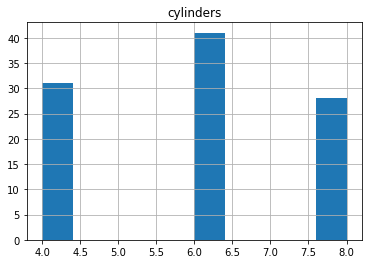

In [20]:
print('Count of most common value of cylinders among different models:')
df.pivot_table(index='model', values='cylinders', aggfunc=lambda x: x.mode()).hist()
plt.show()


We saw that there are values of cylinders that looks odd- 3,5,12. Although that according google there are cars with this number of cylinders, in our data it seems less likely to be the preferable number to fill missing values, so in the histogram we made sure that there arent models that have 3,5 or 12 cylinders as most common value.

In [21]:
#Filling the most common value of cylinders per model in the missing rows:
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))


In [22]:
#checking if there are still missing values
df.cylinders.isna().value_counts()

cylinders
False    51525
Name: count, dtype: int64

4. Odomotor:
In order fill missing values regarding the vehicle's mileage when the ad was published we will use age and condition (because 
it is better to use variables that are completly filled rather than variables that had missing values that were filled by variables - like model year).

In [23]:
df['odometer'].isna().value_counts()

odometer
False    43633
True      7892
Name: count, dtype: int64

In [24]:
#changing the data type of model_year and date_posted to date:
df['model_year'] = pd.to_datetime(df['model_year'], format='%Y').dt.year
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [25]:
df['month']=pd.to_datetime(df['date_posted']).dt.month
df['year']=pd.to_datetime(df['date_posted']).dt.year
df['day']=pd.to_datetime(df['date_posted']).dt.day
#df.head()

In [26]:
df['car_age']=df['year']-df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month,year,day,car_age
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19,6,2018,23,7
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,10,2018,19,7
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2,2019,7,6
3,1500,2003,ford f-150,1,8.0,gas,NaN,automatic,pickup,white,0.0,2019-03-22,9,3,2019,22,16
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4,2019,2,2


In [27]:
#Filling the most common value of cylinders per model in the missing rows:
df['odometer'] = df.groupby(['car_age','condition'])['odometer'].transform(lambda grp: grp.fillna(grp.median()))

#checking if there are still missing values
df.odometer.isna().value_counts()

odometer
False    51513
True        12
Name: count, dtype: int64

In [28]:
df[df['odometer'].isna()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month,year,day,car_age
1101,9200,1975,ford f-150,3,8.0,gas,NaN,automatic,truck,green,0.0,2018-08-28,40,8,2018,28,43
6982,3900,1977,chevrolet suburban,1,8.0,gas,NaN,automatic,SUV,custom,0.0,2019-02-02,71,2,2019,2,42
8511,800,1997,ford f-150,0,8.0,gas,NaN,manual,pickup,white,1.0,2018-05-05,64,5,2018,5,21
20176,3500,2013,honda civic,0,4.0,gas,NaN,automatic,sedan,white,0.0,2018-06-09,33,6,2018,9,5
24014,2400,2013,chevrolet malibu,0,4.0,gas,NaN,automatic,sedan,silver,0.0,2018-05-18,51,5,2018,18,5
25115,5000,1979,gmc sierra,1,8.0,gas,NaN,automatic,truck,green,0.0,2018-05-10,54,5,2018,10,39
28009,65000,1960,chevrolet corvette,4,8.0,gas,NaN,manual,coupe,red,0.0,2018-11-03,41,11,2018,3,58
33257,4500,1963,chevrolet impala,1,6.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-17,38,3,2019,17,56
33907,12995,1908,cadillac escalade,3,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25,6,2018,24,110
45694,18000,1929,ford f-150,2,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59,11,2018,18,89


we see that there are cars that do not have odometer values because there arent more cars that meet the criteria of age&condition. We will fill missing values in the 12 rows by model and condition, believing that the values of the conditions will be aproximately close to the missing values. 

In [29]:
df['odometer'] = df.groupby(['model','condition'])['odometer'].transform(lambda grp: grp.fillna(grp.median()))

#checking if there are still missing values
df.odometer.isna().value_counts()


odometer
False    51524
True         1
Name: count, dtype: int64

In [30]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month,year,day,car_age
24014,2400,2013,chevrolet malibu,0,4.0,gas,NaN,automatic,sedan,silver,0.0,2018-05-18,51,5,2018,18,5


We still have one missing value, that do not have matching model&condition, we will fill it with the median of the condition and type of car (below we can see that there is big difference in the median so we will use two conditions). 

In [31]:
#checking if there is difference between median value depends on the slicing condition
df[df['condition']==0]['odometer'].median() #143347
odometer_value=df.query('condition == 0 & type == "sedan"')['odometer'].median() #108000


In [32]:
df['odometer'][24014]=odometer_value

<ipython-input-32-c286136b2955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['odometer'][24014]=odometer_value


In [33]:
df.odometer.isna().value_counts()


odometer
False    51525
Name: count, dtype: int64

In [34]:
df.info() #making sure all the data is complete now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  month         51525 non-null  int32         
 14  year          51525 non-null  int32         
 15  day           51525 non-null  int32 

## Enrich data

First, we will change rows that the age car is equal to zero (because the model year is equal to the year of the ad) to 1, in order to simlify the next calculations and checks

In [35]:
df.loc[df['car_age']==0 ,'car_age']=1


calculating the average mileage per year

In [36]:
df['avg_mileage'] = df['odometer']/df['car_age']

In [37]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month,year,day,car_age,avg_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19,6,2018,23,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,10,2018,19,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2,2019,7,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,178000.0,automatic,pickup,white,0.0,2019-03-22,9,3,2019,22,16,11125.000000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4,2019,2,2,40451.500000


## Check clean data

In [38]:
# print the general/summary information about the DataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  month         51525 non-null  int32         
 14  year          51525 non-null  int32         
 15  day           51525 non-null  int32 

,price,model_year,condition,cylinders,odometer,is_4wd,date_posted,days_listed,month,year,day,car_age,avg_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.856186,2.637535,6.121494,115153.188734,0.496303,2018-10-25 01:57:46.270742528,39.55476,6.628491,2018.307462,15.449491,8.496128,18346.020561
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.00000,1.000000,2018.000000,1.000000,1.000000,0.000000
25%,5000.000000,2006.000000,2.000000,4.000000,73100.000000,0.000000,2018-07-29 00:00:00,19.00000,3.000000,2018.000000,8.000000,4.000000,10941.176471
50%,9000.000000,2011.000000,3.000000,6.000000,114881.500000,0.000000,2018-10-25 00:00:00,33.00000,7.000000,2018.000000,15.000000,7.000000,15284.142857
75%,16839.000000,2014.000000,3.000000,8.000000,152111.000000,1.000000,2019-01-21 00:00:00,53.00000,10.000000,2019.000000,23.000000,12.000000,21785.714286
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.00000,12.000000,2019.000000,31.000000,110.000000,373200.000000
std,10040.803015,6.192313,0.712447,1.657296,62227.700629,0.499991,NaN,28.20427,3.474134,0.461447,8.736521,6.147993,14132.860962


In [39]:
# print a sample of data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month,year,day,car_age,avg_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19,6,2018,23,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,10,2018,19,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2,2019,7,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,178000.0,automatic,pickup,white,0.0,2019-03-22,9,3,2019,22,16,11125.000000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4,2019,2,2,40451.500000


## Study core parameters


In [40]:
def distribution_calculate(parameter):
    print('The histogram of: {}'.format(parameter))
    df[parameter].hist(bins=50, figsize=(12,8))
    #sns.boxplot(x=df[parameter])
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    ninety_seven = np.percentile(df[parameter], 97)
    three = np.percentile(df[parameter], 3)
    print('---------------------------------------')
    print('minimun border that contains only the small 3% of the data:',three)
    print('maximum border that contains 97% of the data:',ninety_seven)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_seven)
    print('We have',len(df[(df[parameter]<three)|(df[parameter]>ninety_seven)]),"values that we can consider as outliers, out of ", df.shape[0],
          "values. Meaning that outliers are", round(len(df[(df[parameter]<three)|(df[parameter]>ninety_seven)])/df.shape[0],2), "of the data.")
    print('---------------------------------------')
    filter_parameter=(df[parameter]>three)&(df[parameter]<ninety_seven) #making a filter for the data without outliers
    #print(filter_parameter)
    parameter_filtered =df[filter_parameter] #filtered data without outliers in specific variable
    print(f'Now the data will contain information about {parameter_filtered.shape[0]} vehicales only.')
    print('The histogram of filtered {}: '.format(parameter))
    parameter_filtered[parameter].hist(bins=50, figsize=(12,8))
    #sns.boxplot(x=parameter_filtered[parameter])
    plt.show()
    return filter_parameter, parameter_filtered

The histogram of: price


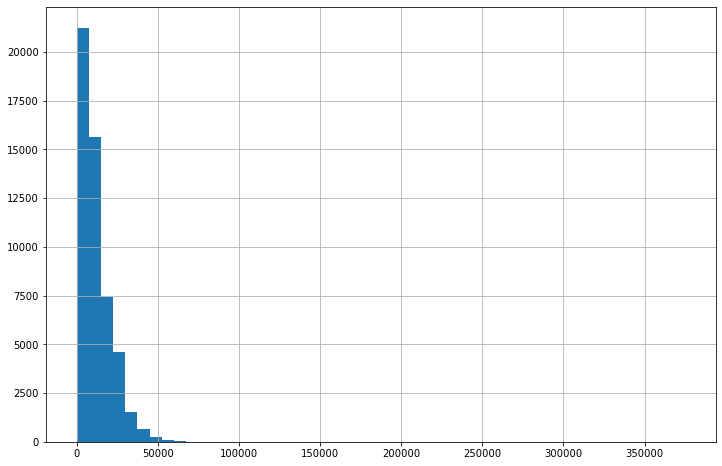

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
minimun border that contains only the small 3% of the data: 1000.0
maximum border that contains 97% of the data: 34950.0
---------------------------------------
The outliers are considered to be values below 1000.0 and above 34950.0
We have 2945 values that we can consider as outliers, out of  51525 values. Meaning that outliers are 0.06 of the data.
---------------------------------------
Now the data will contain information about 48413 vehicales only.
The histogram of filtered price: 


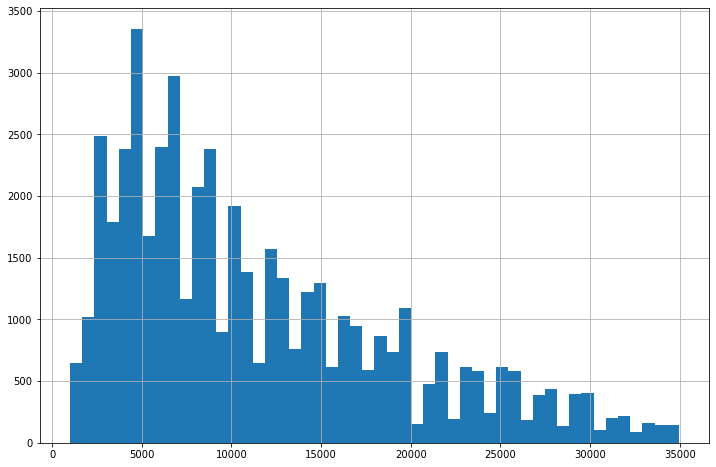

In [41]:
filtering_price, price_filtered = distribution_calculate ('price')


In [42]:
print(price_filtered['price'].describe())

count    48413.000000
mean     11489.696115
std       7743.718340
min       1005.000000
25%       5400.000000
50%       9000.000000
75%      15995.000000
max      34945.000000
Name: price, dtype: float64


After filtering the data from the mathematical outliers, the data is still skewed to the right but looks more uniform in its values. the values that were we cut from the data represented non regular prices, since a car is not that cheap, it sounds not vary reasonable to sell it for 1 or 100 dollar; on the opposite - maybe the high values are real and represent the true value of very expensive or antique car, but they stop us from getting more accurate answers to our question.

The histogram of: car_age


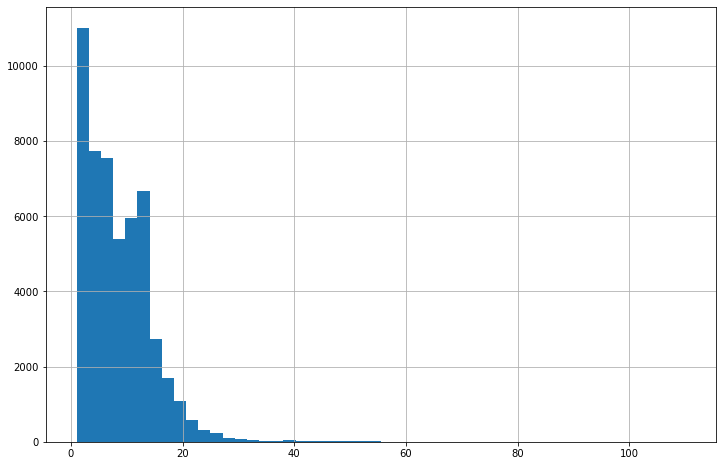

The distribution is skewed to the right
---------------------------------------
Statistics on: car_age
count    51525.000000
mean         8.496128
std          6.147993
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64
---------------------------------------
minimun border that contains only the small 3% of the data: 1.0
maximum border that contains 97% of the data: 21.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 21.0
We have 1309 values that we can consider as outliers, out of  51525 values. Meaning that outliers are 0.03 of the data.
---------------------------------------
Now the data will contain information about 45331 vehicales only.
The histogram of filtered car_age: 


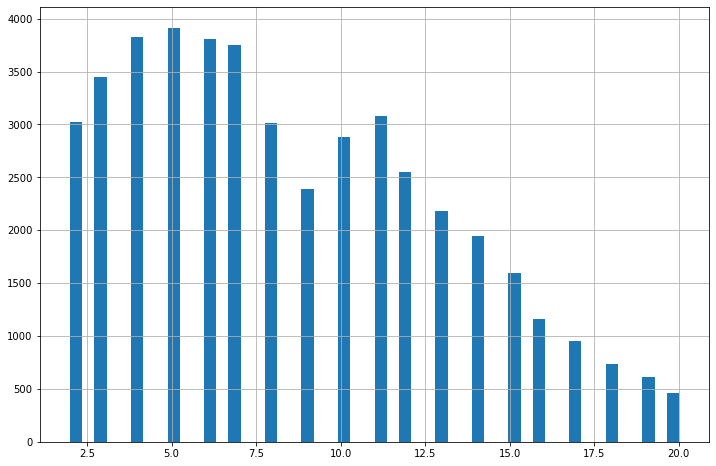

In [43]:
filtering_car_age, car_age_filtered = distribution_calculate ('car_age')

In [44]:
car_age_filtered['car_age'].describe()

count    45331.000000
mean         8.554918
std          4.573536
min          2.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         20.000000
Name: car_age, dtype: float64

Also in the matter of car's age, we see a skeweness of the data to the right. 97% of the data was smaller of 21 years but the rest 3% had really different values with maximum of 110 years.The values that were we cut from the data, which constitute only 3%, represented old cars that are not vary typical since (according to S&P global) the average age of cars is 12.2. We see in the last print that the median and mean did not change a lot, meaning that the filtering did not harmed or changed significantly the data.

In [45]:
#we want to check if the filtering of the two previous variables of age and price, leads to small data compared to the original df
duplicate_df= pd.concat([car_age_filtered,price_filtered], axis=1, join="inner").reset_index(drop=True)
duplicate_df = duplicate_df.iloc[:,0:18]
print(round(duplicate_df.shape[0]/df.shape[0],2))
#We still have 85% of the df so it's ok

0.85


The histogram of: cylinders


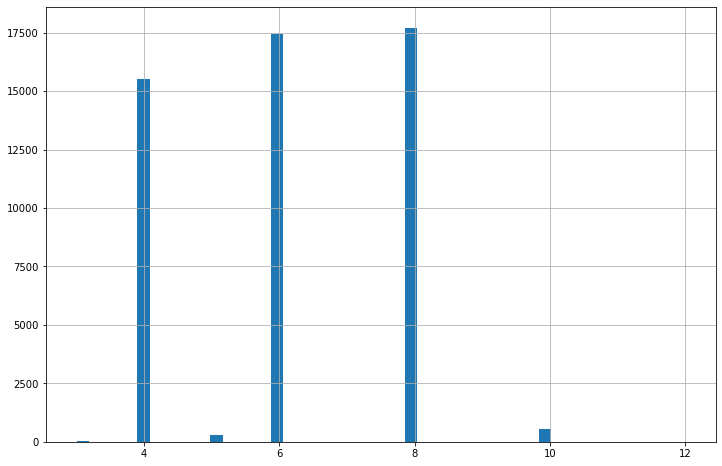

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
minimun border that contains only the small 3% of the data: 4.0
maximum border that contains 97% of the data: 8.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 8.0
We have 585 values that we can consider as outliers, out of  51525 values. Meaning that outliers are 0.01 of the data.
---------------------------------------
Now the data will contain information about 17729 vehicales only.
The histogram of filtered cylinders: 


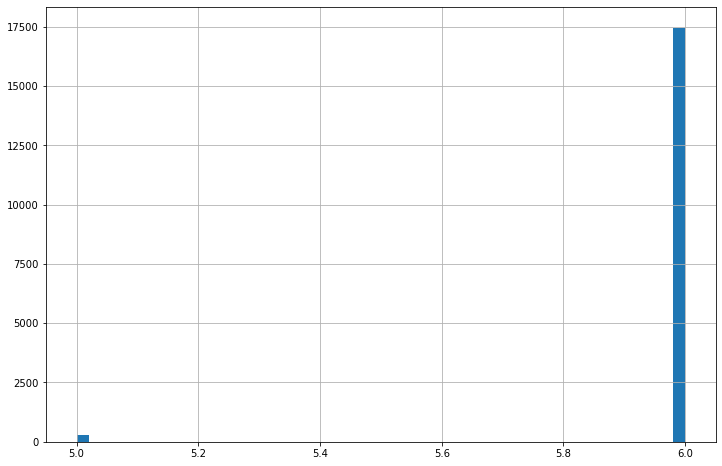

In [46]:
filtering_cylinders, cylinders_filtered = distribution_calculate ('cylinders')

The filtered cylinder data looks very problematic, since the data is based on vary few categories, the filtering takes out most of it and leaving us with only 17,727 rows. we want to check how the theoretical outliers look like, based on IQR :

In [47]:
Q1 = df['cylinders'].quantile(0.25)
Q3 = df['cylinders'].quantile(0.75)
IQR = Q3 - Q1
min_iqr=Q1-1.5*IQR
max_iqr=Q3+1.5*IQR
print(f'the minimum value is: {min_iqr}, and the maximum value is:{max_iqr}')

the minimum value is: -2.0, and the maximum value is:14.0


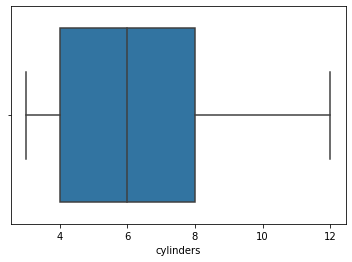

In [48]:
sns.boxplot(x=df['cylinders'], showfliers = False)
plt.show()

meaning that, based on quartiles, we don't have any outliers because all the values are in the range.

The histogram of: avg_mileage


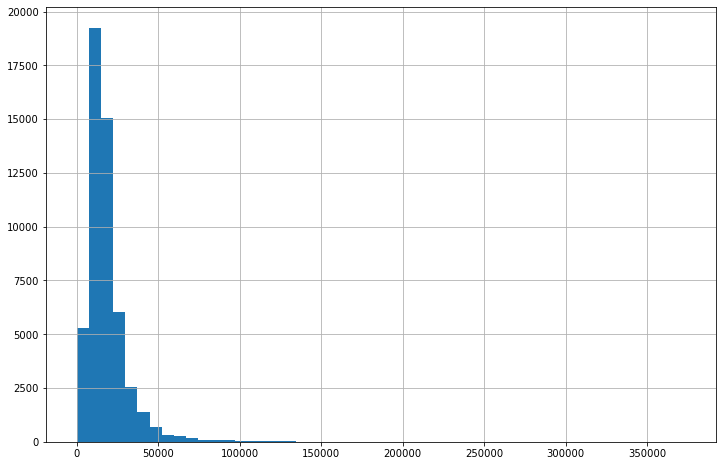

The distribution is skewed to the right
---------------------------------------
Statistics on: avg_mileage
count     51525.000000
mean      18346.020561
std       14132.860962
min           0.000000
25%       10941.176471
50%       15284.142857
75%       21785.714286
max      373200.000000
Name: avg_mileage, dtype: float64
---------------------------------------
minimun border that contains only the small 3% of the data: 2579.572
maximum border that contains 97% of the data: 48500.0
---------------------------------------
The outliers are considered to be values below 2579.572 and above 48500.0
We have 3088 values that we can consider as outliers, out of  51525 values. Meaning that outliers are 0.06 of the data.
---------------------------------------
Now the data will contain information about 48432 vehicales only.
The histogram of filtered avg_mileage: 


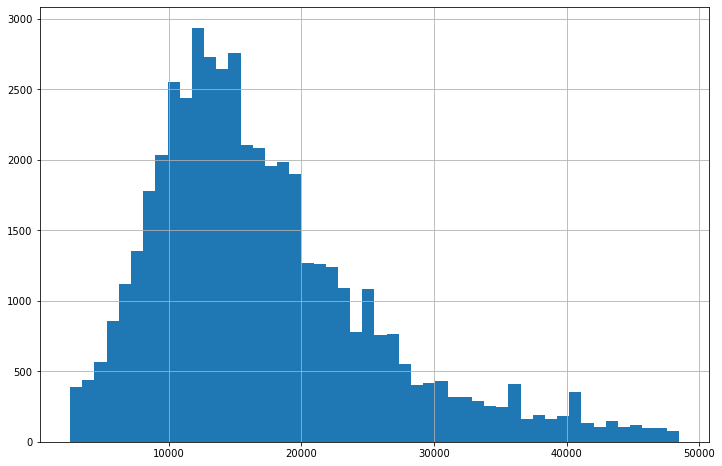

In [49]:
filtering_avg_mil, avg_mil_filtered = distribution_calculate ('avg_mileage')

the data is skewed to the right but after filtering it looks more reasonable. the values that were we cut from the data represented riding 7 km every day or less than that; and riding 132 km every day or more. both represent non regular behavior pattern which won't help us understand the effect of the variables on the speed of purchasing the car (removing the ad) because they are not typical.

In [50]:
#we want to check if the filtering of the two previous variables of age, mileage and price, leads to small data compared to the original df
duplicate_df= pd.concat([car_age_filtered,price_filtered, avg_mil_filtered], axis=1, join="inner").reset_index(drop=True)
duplicate_df = duplicate_df.iloc[:,0:18]
print(round(duplicate_df.shape[0]/df.shape[0],2)) 
#we have 82% of the data


0.82


## Ads lifetime


In [51]:
duplicate_df['days_listed'].describe()

count    42080.000000
mean        39.577020
std         28.267696
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

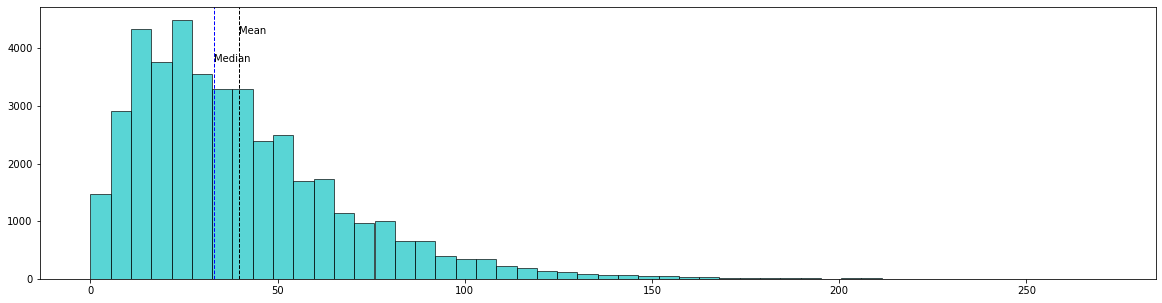

In [52]:
fig=plt.figure(figsize=(20,5))
plt.hist(duplicate_df['days_listed'], bins=50, color='c', edgecolor='k', alpha=0.65)
plt.axvline(duplicate_df['days_listed'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(duplicate_df['days_listed'].mean()*1, max_ylim*0.9, 'Mean')
plt.axvline(duplicate_df['days_listed'].median(), color='b', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(duplicate_df['days_listed'].median()*1, max_ylim*0.8, 'Median')

plt.show()

We see that the variable is skewed to the right, the mean is bigger than the median.

In [53]:
ninety_seven = np.percentile(duplicate_df['days_listed'], 97)
three = np.percentile(duplicate_df['days_listed'], 3)
print('---------------------------------------')
print('minimun border that contains only the small 3% of the data:',three)
print('maximum border that contains 97% of the data:',ninety_seven)


---------------------------------------
minimun border that contains only the small 3% of the data: 5.0
maximum border that contains 97% of the data: 106.0


In [54]:
duplicate_df['too_fast']= duplicate_df['days_listed']<5.0
duplicate_df['too_slow']= duplicate_df['days_listed']>106.0

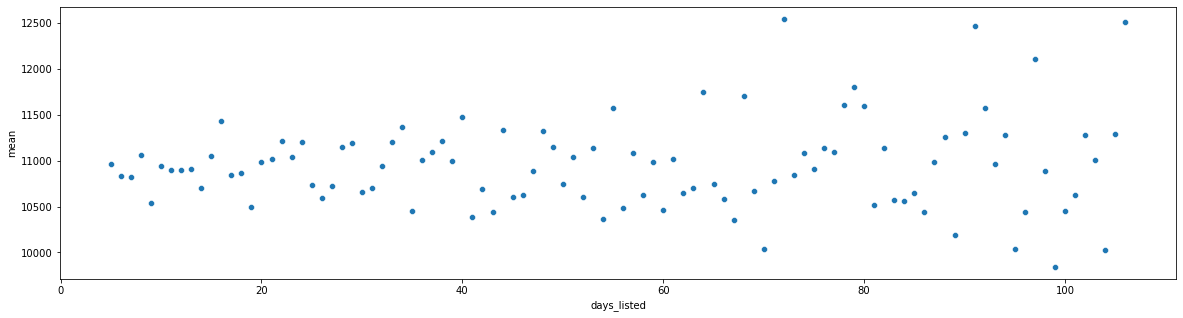

In [55]:
price_fast = duplicate_df.query('too_slow==0.0 & too_fast==0.0').groupby("days_listed")["price"].agg(['count','mean']).reset_index()
price_fast
fig=plt.figure(figsize=(20,5))
sns.scatterplot(data=price_fast, x='days_listed', y="mean")
plt.show()

We cannot learn a lot from the latest graph, that investigates the connection between car's price and days listed - since it do not imply that there is a correlation.
we see a pleatau until x=70 and then the data is messy. So we will try and see if there is a relationship of condition and amount of days

In [56]:
type_fast = duplicate_df.query('too_slow==0.0 & too_fast==0.0').groupby(['type'])['days_listed'].agg(['mean','median', 'count']).sort_values(by='count').reset_index()
type_fast


,type,mean,median,count
0,bus,32.000000,29.0,11
1,offroad,36.801418,32.0,141
2,other,37.343750,33.0,192
3,convertible,37.787645,33.0,259
4,van,37.075875,32.0,514
5,hatchback,38.974790,35.0,833
6,mini-van,36.542531,32.0,964
7,wagon,38.037984,34.0,1290
8,coupe,36.789951,32.0,1433
9,pickup,37.809403,33.0,5126


also a quick check of the median and mean of days for ad, by type of vehicale shows close results for all types. We want to check how conditions are related:

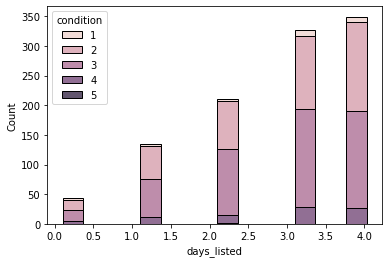

In [57]:
sns.histplot(data=duplicate_df.query('too_fast==1.0'), x="days_listed", hue="condition", multiple="stack", shrink=.8)
plt.show()

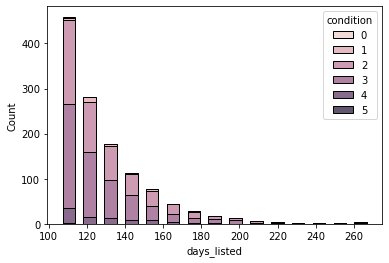

In [58]:
sns.histplot(data=duplicate_df.query('too_slow==1.0'), x="days_listed", hue="condition",  multiple="stack",shrink=.6, bins=15)
plt.show()

Focusing on the small outliers, that are smallest 3% of the data, we see that the better condition (higher category number) the faster it selles.
This pattern is seen also when we focus on the highest 3% of the data - the high majority belongs to cars in good or excelent conditions and only small amount of cars in like new condition.

In [59]:
cond_fast = duplicate_df.query('too_slow==0.0 & too_fast==0.0').groupby(['days_listed', 'condition'])['days_listed'].agg(['count','mean']).reset_index()
cond_fast

,days_listed,condition,count,mean
0,5,0,1,5.0
1,5,1,15,5.0
2,5,2,166,5.0
3,5,3,192,5.0
4,5,4,32,5.0
...,...,...,...,...
473,106,0,1,106.0
474,106,1,1,106.0
475,106,2,16,106.0
476,106,3,29,106.0


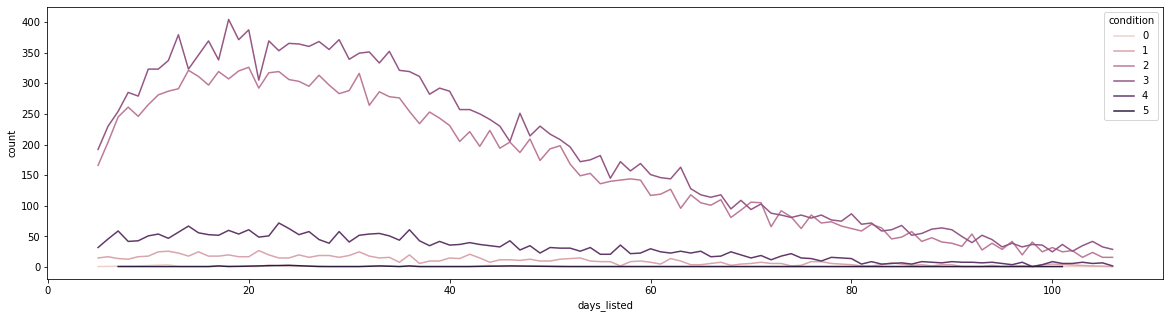

In [60]:
fig=plt.figure(figsize=(20,5))
sns.lineplot(data=cond_fast, x="days_listed", y="count", hue="condition")
plt.show()

First of all we see that the amount of cars in conditions 2,3 is the highest compared to the rest. Both 2 and 3 categories show incline in the days listed from 5 to 20 days and from then a decline, meaning that most of the cars in these categories are sold before 3 weeks of listing an ad. Categories 0,1,4 and 5 do not show significant changes over time.
Since the graphs of the first and last 3% act in the same manner as the graph of the data above, we decided to leave them and do not filter them.

## Average price per each type of vehicle

In [61]:
type_fast_full = duplicate_df.groupby(['type'])['days_listed'].agg(['mean','median', 'count']).sort_values(by='count').reset_index()
type_fast_full

,type,mean,median,count
0,bus,32.000000,29.0,11
1,offroad,41.188312,32.5,154
2,other,38.090452,33.0,199
3,convertible,38.780220,33.0,273
4,van,39.219963,33.0,541
5,hatchback,40.531674,35.0,884
6,mini-van,38.904576,32.0,1027
7,wagon,40.483130,34.0,1393
8,coupe,39.502316,33.0,1511
9,pickup,39.306171,33.0,5412


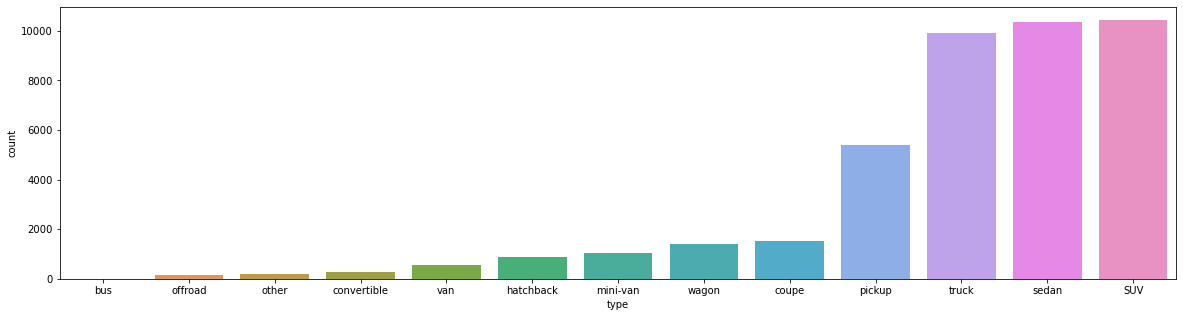

In [62]:
#analyzing number of ads per vehicle type:
fig=plt.figure(figsize=(20,5))
sns.barplot(x="type", y="count", data=type_fast_full)
plt.show()

We can see that the majority of ads belongs to trucks, sedans and SUV, smaller than them are the pickup and then rest of the types with buses as the lowest category. Later we will analize the SUV and sedan because they have the biggest amount of data (ads).

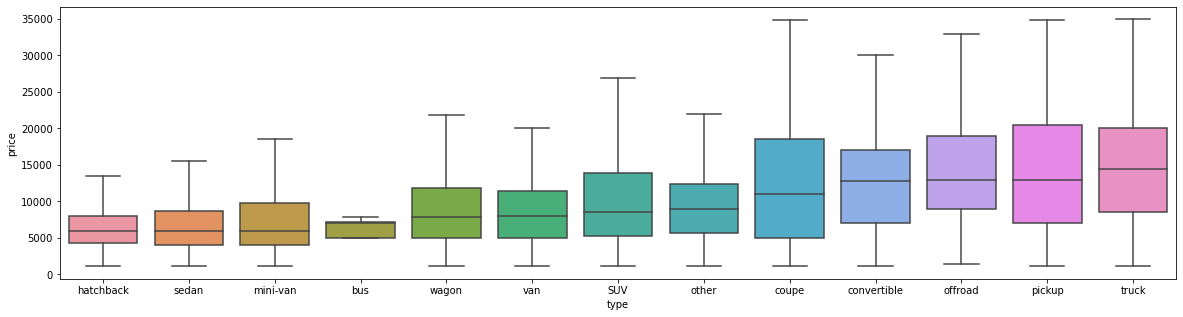

In [63]:
#analizing the difference of prices between vehicle types:
fig=plt.figure(figsize=(20,5))
#creating df to create a list of types in ascending median values for the graph 
price_type= duplicate_df.groupby('type')['price'].agg(['count', 'median']).sort_values(by='median').reset_index()
price_type_list=price_type['type'].values.tolist()
sns.boxplot(data=duplicate_df, x="type", y="price", showfliers=False, order=price_type_list)
plt.show()

We see that there is big variation in the prices listed for every type. Sedan- one of the two most common types listed, has low price range, and almost the lowest overall. On other hand, the SUV is in the middle and has pretty big variation of prices and long right tail.

## Price factors

Now we will analyze the two most popular types and try to answer on the following questions: 

    1. dependence of price by age of the car   
    2. dependence of price by mileage of the car
    3. dependence of price by condition of the car
    4. dependence of price by transmission type of the car   
    5. dependence of price by color of the car    

In [64]:
#creating df with information only for the two types- SUV and sedan:
subset_suv = duplicate_df.query('type=="SUV"').reset_index(drop=True)
subset_sedan = duplicate_df.query('type=="sedan"').reset_index(drop=True)
#subset_df.info()


<Figure size 1440x1440 with 0 Axes>

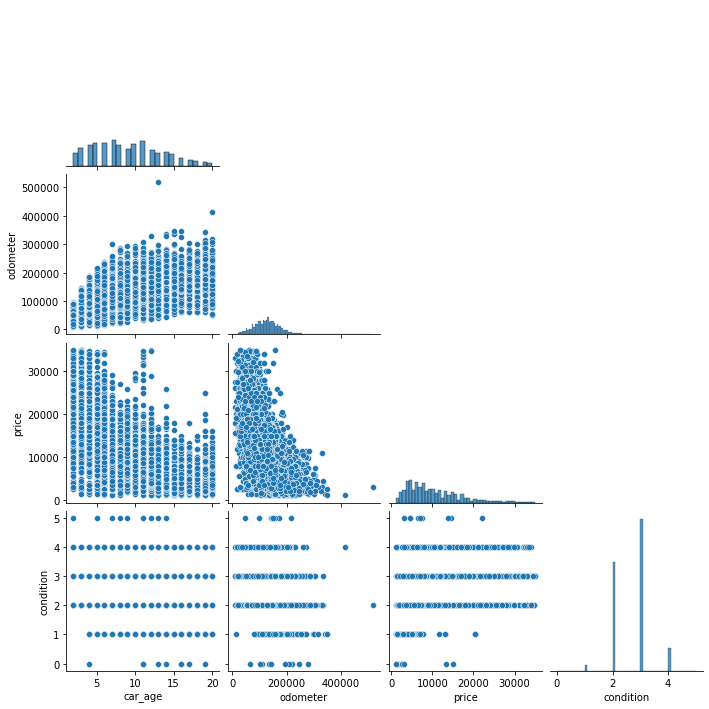

In [65]:
subset_suv_pivot = subset_suv[['car_age', 'odometer','price', 'condition']]
fig=plt.figure(figsize=(20,20))
sns.pairplot(subset_suv_pivot, corner=True)
plt.show()

In [66]:
subset_suv_pivot[subset_suv_pivot.columns[0:3]].corr()

,car_age,odometer,price
car_age,1.000000,0.625186,-0.618524
odometer,0.625186,1.000000,-0.606156
price,-0.618524,-0.606156,1.000000


In [67]:
#checking if all the cells include more than 50 values
subset_suv_pivot.groupby('condition')['condition'].value_counts()

condition
0      10
1     213
2    3912
3    5489
4     806
5       9
Name: count, dtype: int64

In [68]:
subset_suv_pivot[(subset_suv_pivot['condition']>0) & (subset_suv_pivot['condition']<5)][['price','condition']].corr(method='spearman')

,price,condition
price,1.000000,0.270964
condition,0.270964,1.000000


transmission
automatic    9929
manual        422
other          88
Name: count, dtype: int64
_________________________________
             count          mean median
             price         price  price
transmission                           
automatic     9929  10146.582838   8495
manual         422  12077.135071  11944
other           88  12588.943182  12900


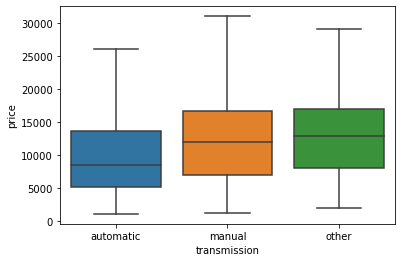

In [69]:
#Checking that all categories include more than 50 values
print(subset_suv.groupby('transmission')['transmission'].value_counts())
print('_________________________________')
print(subset_suv.pivot_table(index='transmission', values='price',aggfunc=(['count','mean', 'median'])))
#plotting the correlation between price and type of transmission:
sns.boxplot(x="transmission", y="price", data=subset_suv,showfliers = False)
plt.show()


paint_color
black     2703
blue       989
brown      337
custom     255
green      384
grey      1148
orange      71
purple      34
red        791
silver    1821
white     1865
yellow      41
Name: count, dtype: int64
_________________________________
             count                       
              mean                       
            median                       
             count          mean   median
paint_color                              
black         2703  11947.151313  10800.0
blue           989   8315.685541   6995.0
brown          337   8404.762611   7300.0
custom         255   9637.858824   8495.0
green          384   8588.111979   6900.0
grey          1148   9706.673345   7995.0
orange          71  15212.126761  16900.0
red            791   9546.112516   7850.0
silver        1821   9406.574410   7995.0
white         1865  10810.004290   8995.0


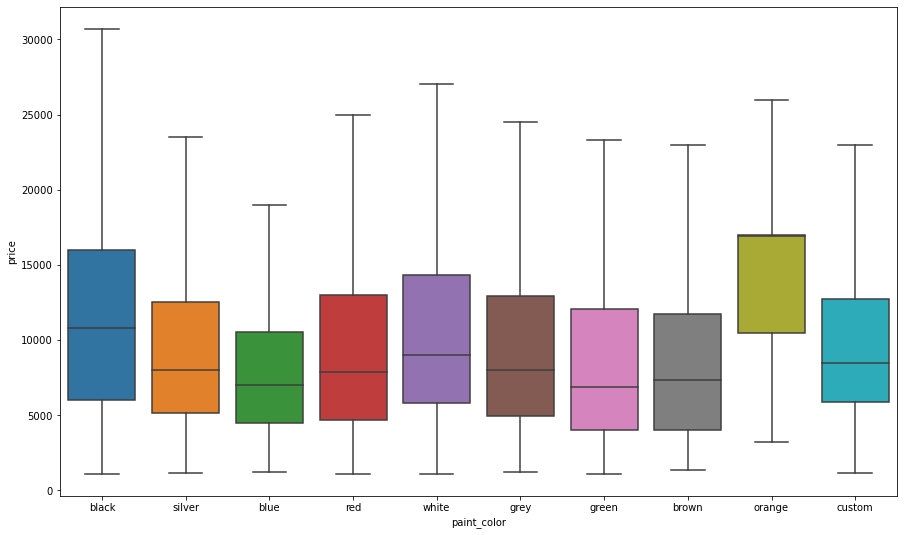

In [70]:
#Checking that all categories include more than 50 values
print(subset_suv.groupby('paint_color')['paint_color'].value_counts())
print('_________________________________')
print(subset_suv.query('paint_color!="purple"& paint_color!="yellow"').pivot_table(index='paint_color', values='price',aggfunc=[('count', 'mean','median')]))
fig=plt.figure(figsize=(15,9))
sns.boxplot(x="paint_color", y="price", data=subset_suv.query('paint_color!="purple"& paint_color!="yellow"'),showfliers = False)
plt.show()

SUV:
1. Car age: overall we can see that older age affects the price - age is negatively associated with price. The correlation is -.62 meaning a negative medium correlation between age and price.
2. Mileage: Mileage affects the price - mileage is negatively associated with price. The correlation is -.61 meaning a negative medium correlation between mileage and price.
3. Condition: overall we can see that better condition affects mildly the price - condition is positively associated with price. The correlation is .27 meaning a weak positive correlation between condition and price.
4. Transmission: The manual transmission' values vary  more than other two categories and has the lowest median value. Overall 'other' category has the highest values of price but it has significantly smaller count of values. 
5. Color: there is a relationship between car's color and its price. Blue,green and brown are the colors that have the lowest medians; meaning that in that case the color is correlated to lower prices. On the other side, orange, black and white have the highest medians, meaning that these colors are associated with higher prices compared to others.

<Figure size 1440x1440 with 0 Axes>

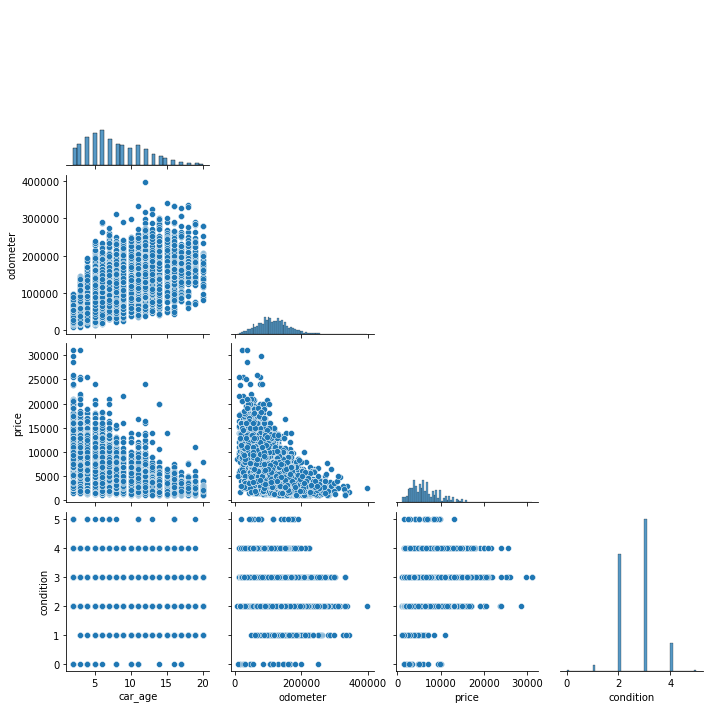

In [71]:
subset_sedan_pivot = subset_sedan[[ 'car_age', 'odometer', 'price','condition']]
fig=plt.figure(figsize=(20,20))
sns.pairplot(subset_sedan_pivot, corner=True)
plt.show()

In [72]:
subset_sedan_pivot[subset_sedan_pivot.columns[0:3]].corr()

,car_age,odometer,price
car_age,1.000000,0.610436,-0.646719
odometer,0.610436,1.000000,-0.623945
price,-0.646719,-0.623945,1.000000


In [73]:
#checking if all the cells include more than 50 values
subset_sedan_pivot.groupby('condition')['condition'].value_counts()


condition
0      23
1     199
2    3970
3    5178
4     951
5      21
Name: count, dtype: int64

In [74]:
subset_sedan_pivot[(subset_sedan_pivot['condition']>0) & (subset_sedan_pivot['condition']<5)][['price','condition']].corr(method='spearman')

,price,condition
price,1.000000,0.292745
condition,0.292745,1.000000


transmission
automatic    9780
manual        501
other          61
Name: count, dtype: int64
_________________________________
             count         mean median
             price        price  price
transmission                          
automatic     9780  6737.581288   5995
manual         501  5330.185629   4500
other           61  7068.377049   5988


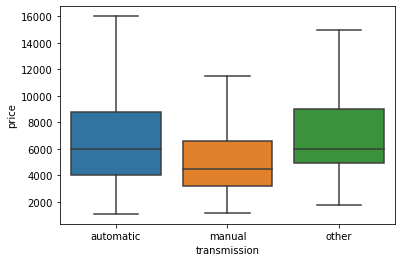

In [75]:
#Checking that all categories include more than 50 values
print(subset_sedan.groupby('transmission')['transmission'].value_counts())
print('_________________________________')
print(subset_sedan.pivot_table(index='transmission', values='price',aggfunc=(['count','mean', 'median'])))
#plotting the correlation between price and type of transmission:
sns.boxplot(x="transmission", y="price", data=subset_sedan,showfliers = False)
plt.show()


paint_color
black     1918
blue      1176
brown      233
custom     238
green      187
grey      1903
orange       7
purple      23
red        804
silver    2593
white     1240
yellow      20
Name: count, dtype: int64
_________________________________
             count                     
              mean                     
            median                     
             count         mean  median
paint_color                            
black         1918  7312.732013  6525.0
blue          1176  6214.715136  5725.0
brown          233  5142.721030  4498.0
custom         238  6752.537815  5850.0
green          187  4834.540107  3995.0
grey          1903  6581.117709  5995.0
red            804  6742.050995  5995.0
silver        2593  6494.418049  5850.0
white         1240  7154.560484  6495.0


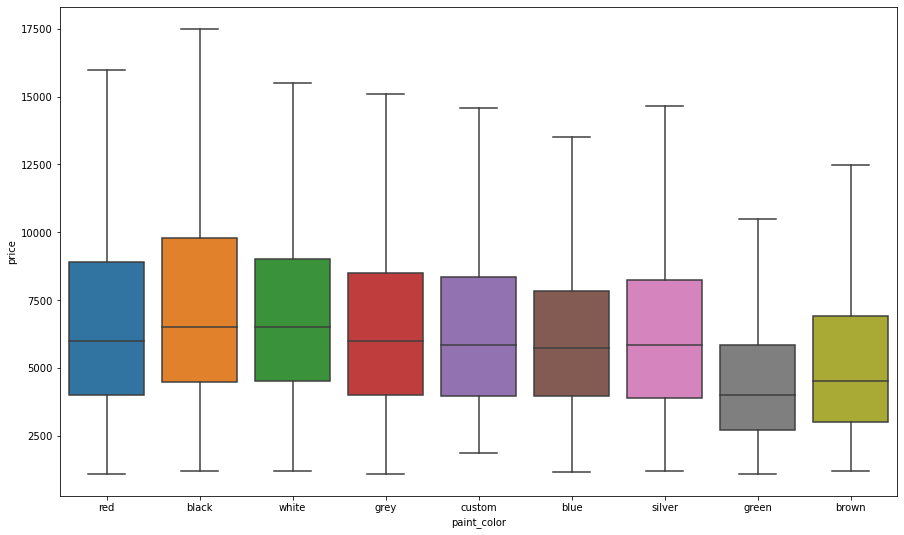

In [76]:
#Checking that all categories include more than 50 values
print(subset_sedan.groupby('paint_color')['paint_color'].value_counts())
print('_________________________________')
#without the cells that include less than 50 values:
print(subset_sedan.query('paint_color!="orange"& paint_color!="yellow"& paint_color!="purple"').pivot_table(index='paint_color', values='price',aggfunc=[('count', 'mean','median')]))
fig=plt.figure(figsize=(15,9))
sns.boxplot(x="paint_color", y="price", data=subset_sedan.query('paint_color!="orange"& paint_color!="yellow"& paint_color!="purple"'),showfliers = False)
plt.show()

Sedan:
1. Car age: overall we can see that older age affects the price - age is negatively associated with price. The correlation is -.65 meaning a negative medium correlation between age and price.
2. Mileage: Mileage affects the price - mileage is negatively associated with price. The correlation is -.62 meaning a negative medium correlation between mileage and price.
3. Condition: overall we can see that better condition affects mildly the price - condition is positively associated with price. The correlation is .29 meaning a weak positive correlation between condition and price.
4. Transmission: The manual transmission'has the lowest median value. 'Automatic' category has the highest median value of pricebut values vary  more than other two categories.
5.There is a relationship between car's color and its price. Blue,green and brown are the colors that have the lowest medians; meaning that in that case the color is correlated to lower prices. On the other side, black and white have the highest medians,and after them grey & red, meaning that these colors are associated with higher prices compared to others.

## General conclusion


The original dataset included 51525 rows of car listed in the website, some of the columns had missing values that were treated by filling the most common values or the medians in order to not lose information. Later, the main variables were checked for outliers and in cases that we have found a reason to ommit them, and the filtering did not minimze the data significantly, we filtered them out. After cleaning the data we have found that SUV and sadan were the two types of machines that had biggest value of ads listed. We analyzed our research questions based on the data of the two most common types. The analyses resulted in the following conclusions:
1. higher condition (meaning better condition of the car) leads to faster sales of the car and slightly higher prices.
2. car's higher age leads to lower prices.
3. Higher mileage leads to lower prices.
4. Cars with manual transmission are being sold in cheaper prices compared to other transmission options. Sedans with automatic  transsmision are priced with highest prices while in SUV's the 'other' category is the most expensive.
5. Suv cars in the colors of orange, black and white are being sold with the highest prices in median, while in sedan's these are white, black, grey and red. In both car types, blue,  green and brown cars are being sold with the lowest median prices. 
